<a href="https://colab.research.google.com/github/Yoris95/Mushroom_Classification/blob/main/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 1 : **Data Collection**

Question to ask?
1. What kind of problem are we trying to solve? This data set is a secunder data, it includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one. The characteristics of mushrooms and edible ones are still very difficult to distinguish, so that they can trigger poisoning. Therefore, I am trying to use machine learning models to detect whether a mushroom is edible or poisonous.  

2. What data sources already exist? Kaggle or UCI ML Repository
3. What privacy concern are there? -
4. Is the data public? Yes, it is
5. Where should we store the data? Anywhere 

In [1]:
import pandas as pd

In [2]:
# Get the data
df = pd.read_csv('agaricus-lepiota.csv', header = None)

Phase 2: **Data Preparation**
1. Exploratory Data Analysis (EDA)
2. Data Preprocessing
3. Data Splitting

**Exploratory Data Analysis (EDA)**

Question to ask?
1. What are the feature variables and target variables? 
2. What kind of data do you have?
3. Are there missing values? Should you remove them or fill them with feature imputation?
4. Where are the outliers? How many of them are there?
5. Are there questions you could ask a domain expert about the data? 



In [3]:
# Rename all the columns
df.rename(columns={0 : 'class', 1 :'cap-shape', 2 :'cap-surface', 3 :'cap-color', 4 :'bruises', 5 :'odor',
                            6 :'gill-attachment', 7 :'gill-spacing', 8 :'gill-size', 9 :'gill-color',
                     10 :'stalk-shape', 11 :'stalk-root', 12 :'stalk-surface-above-ring', 13 :'stalk-surface-below-ring',
                     14 :'stalk-color-above-ring', 15 :'stalk-color-below-ring', 16 :'veil-type', 17:'veil-color', 
                     18:'ring-number', 19:'ring-type', 20:'spore-print-color', 21:'population', 22:'habitat'}, inplace=True)

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
df.shape

(8124, 23)

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
for column in df.columns:
  print(column, ": ", df[column].unique())

class :  ['p' 'e']
cap-shape :  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface :  ['s' 'y' 'f' 'g']
cap-color :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises :  ['t' 'f']
odor :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment :  ['f' 'a']
gill-spacing :  ['c' 'w']
gill-size :  ['n' 'b']
gill-color :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape :  ['e' 't']
stalk-root :  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring :  ['s' 'f' 'k' 'y']
stalk-surface-below-ring :  ['s' 'f' 'y' 'k']
stalk-color-above-ring :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type :  ['p']
veil-color :  ['w' 'n' 'o' 'y']
ring-number :  ['o' 't' 'n']
ring-type :  ['p' 'e' 'l' 'f' 'n']
spore-print-color :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population :  ['s' 'n' 'a' 'v' 'y' 'c']
habitat :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [12]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

**Data Preprocessing**

1. Feature Imputation (filling missing value)
2. Feature Encoding (turning values into numbers)
3. Feature Normalization or Scalling
4. Feature Engineering
5. Feature Selection (select the most valuable features of your datasets)
6. Dealing with imbalances

**Feature Imputation**

In [13]:
df.iloc[:,0:12]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root
0,p,x,s,n,t,p,f,c,n,k,e,e
1,e,x,s,y,t,a,f,c,b,k,e,c
2,e,b,s,w,t,l,f,c,b,n,e,c
3,p,x,y,w,t,p,f,c,n,n,e,e
4,e,x,s,g,f,n,f,w,b,k,t,e
...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?
8120,e,x,s,n,f,n,a,c,b,y,e,?
8121,e,f,s,n,f,n,a,c,b,n,e,?
8122,p,k,y,n,f,y,f,c,n,b,t,?


In [14]:
# There are some missing values in "stalk-root" feature
df['stalk-root'][df['stalk-root']=='?']

3984    ?
4023    ?
4076    ?
4100    ?
4104    ?
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 2480, dtype: object

In [15]:
(len(df[df['stalk-root']=='?'])/len(df))*100

30.526834071885773

In [78]:
# About 30.52% information of stalk-root is missing.

In [ ]:
pip install ipympl

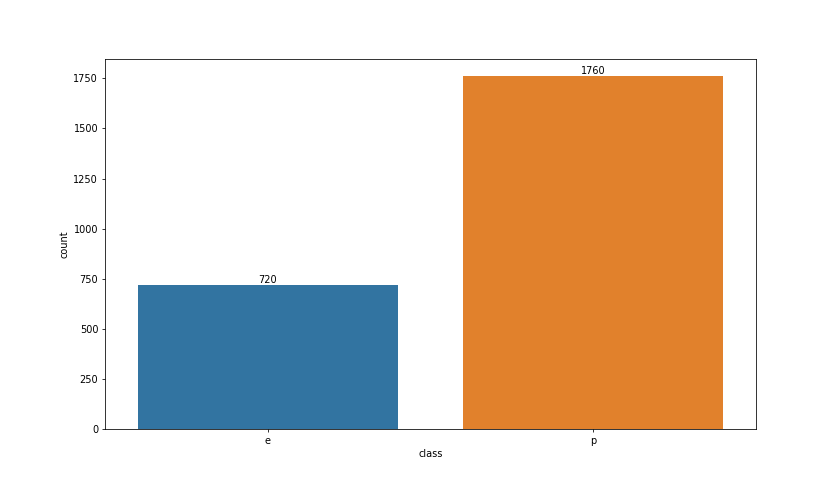

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7),dpi=70)
ax=sns.countplot(data=df[df['stalk-root']=='?'], x='class')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
#out of 2480 of missing values, 1760 belongs to poisonous class and 720 belongs to edible class

In [23]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

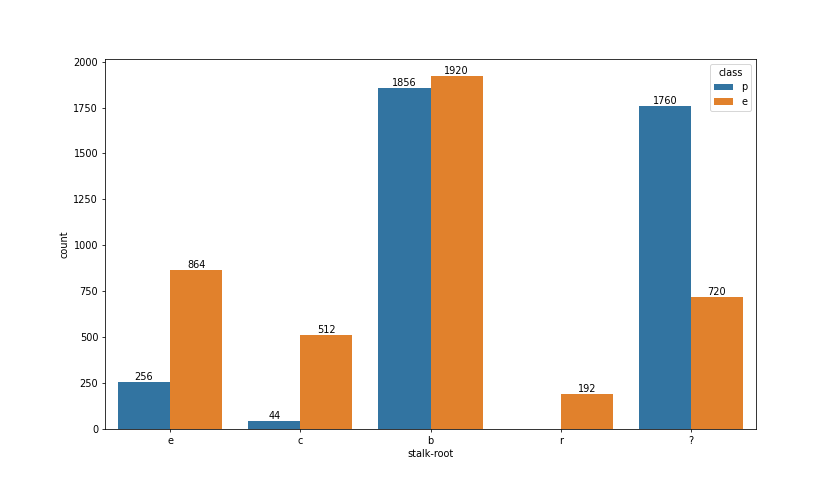

In [26]:
plt.figure(figsize=(12,7),dpi=70)
ax=sns.countplot(data=df,x='stalk-root',hue='class')
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
# Conclusion:
# 1. 2480 rows (i.e 30% data) in stalk-root feature are missing
# 2. out of them 1760 (71% of data) belongs to poisonous class & 720 (29% of data) belongs to edible
# 3. Highest occurance of stalk-root values is 'b'
# 4. out of 8124, 3776 (46%) values are of 'b', 
# 5. out of 3776 of 'b's, there are 1856 'poisonous' and 1920 'edible'

In [27]:
# filling missing values with 'b'
df['stalk-root']=df['stalk-root'].replace('?',df['stalk-root'].mode()[0])

In [29]:
df['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, Length: 8124, dtype: object

In [30]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

**Feature Encoding**

In [31]:
# Turn labels into distinct numerical values by using label encoder

from sklearn.preprocessing import LabelEncoder
def label_encoding(c):
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])
    df[c].unique()
for col in df.columns:
    label_encoding(col)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
